In [ ]:
%cd ../

In [194]:
from tvDatafeed import TvDatafeed, Interval
from dotenv import load_dotenv
import os
import pandas as pd
import pyutil
import backtrader as bt
import numpy as np
import talib as ta
import json
import pickle
import datetime
from tabulate import tabulate
from prettytable import PrettyTable
import tenxsqueeze as txs
import inspect
import seaborn as sns
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

In [156]:
df = pd.read_pickle("stf_consecutive.pkl").dropna()
epsilon = 0.001
df["PLr"] = (np.log(df["max"] + epsilon) - np.log(-df["min"] + epsilon))
df["PLd"] = df["max"] + df["min"]

In [160]:
df[df.N > 3].sort_values("PLd")

,ticker,tf,N,T,min,max,final,start,end,dir,PLr,PLd
102820,GNRC,30m,4,30,-28.563103,0.071230,-28.274947,2023-08-01 12:00:00,2023-08-03 15:30:00,1.0,-5.980055,-28.491873
102844,GNRC,30m,5,30,-28.516815,0.110154,-26.929307,2023-08-01 12:00:00,2023-08-04 09:30:00,1.0,-5.547372,-28.406661
102860,GNRC,30m,6,30,-28.417091,0.139506,-26.684619,2023-08-01 12:00:00,2023-08-04 10:00:00,1.0,-5.309530,-28.277585
102660,GNRC,15m,5,30,-25.864973,0.000000,-25.048594,2023-08-01 13:30:00,2023-08-02 15:30:00,1.0,-10.160684,-25.864973
102819,GNRC,30m,4,15,-25.908178,0.071230,-25.189406,2023-08-01 12:00:00,2023-08-02 14:30:00,1.0,-5.882501,-25.836949
...,...,...,...,...,...,...,...,...,...,...,...,...
77026,DPZ,30m,5,10,-0.014324,17.306480,11.642698,2023-07-11 12:30:00,2023-07-12 13:00:00,1.0,7.029462,17.292156
77025,DPZ,30m,5,5,-0.014324,17.306480,10.625680,2023-07-11 12:30:00,2023-07-12 10:30:00,1.0,7.029462,17.292156
77028,DPZ,30m,5,30,-0.014324,17.306480,11.169999,2023-07-11 12:30:00,2023-07-14 10:00:00,1.0,7.029462,17.292156
83284,LLY,5m,4,15,-0.354438,17.666872,16.238112,2023-08-07 15:00:00,2023-08-08 10:00:00,1.0,3.906152,17.312434


# High Profit-Loss difference (PLd)
## DPZ 30m (N=5, T=5) min=-0.01, max=17.3, PLr=7.0, PLd=17.3
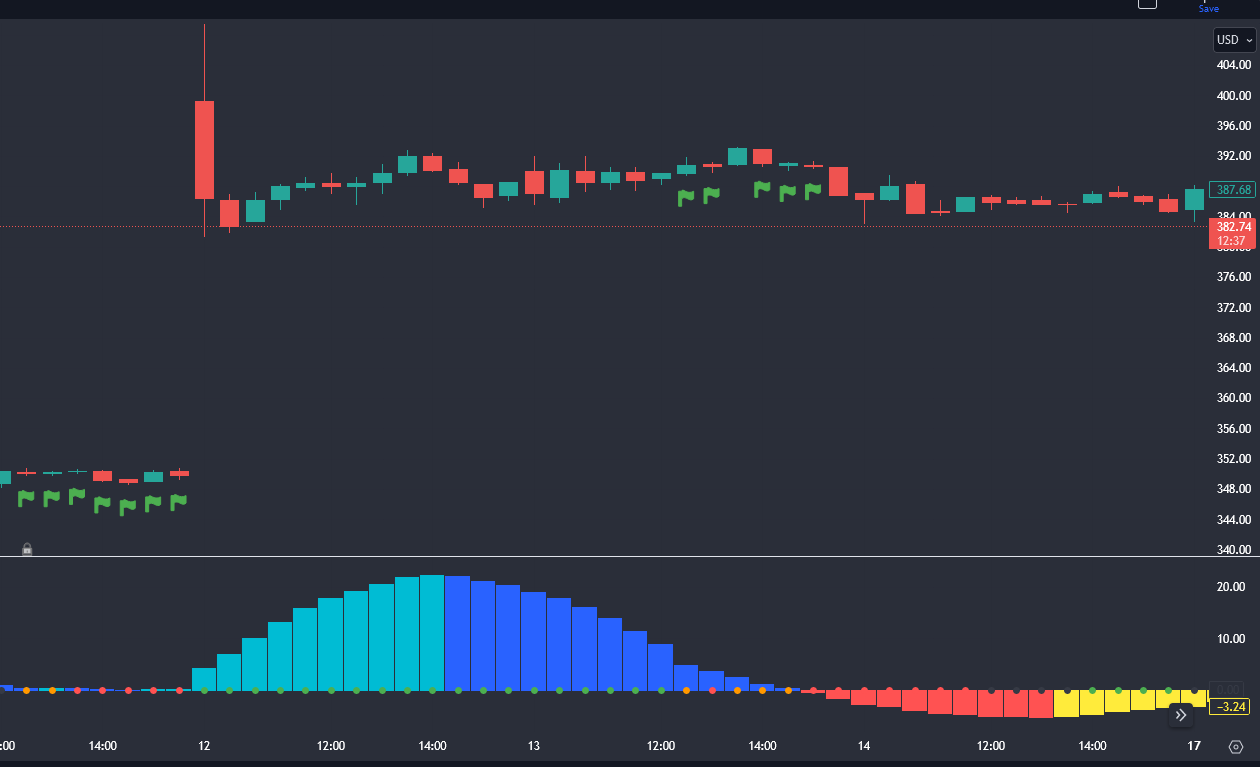
## DPZ 5m (N=4, T=15) min=-0.35, max=17.7, PLr=3.9, PLd=17.3
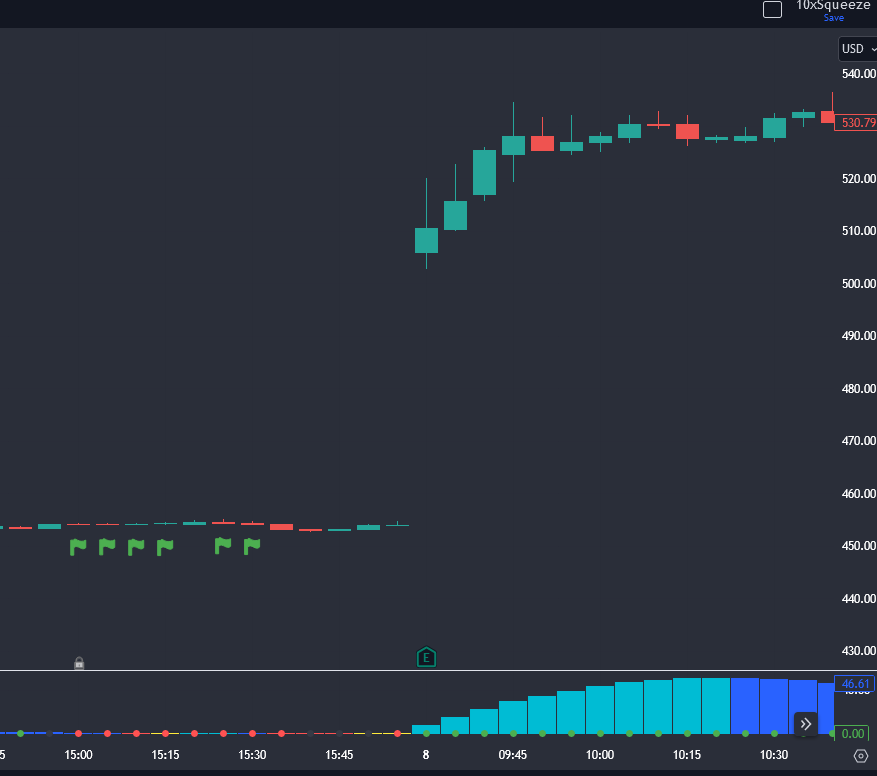

In [161]:
df[df.N > 3].sort_values("PLr")

,ticker,tf,N,T,min,max,final,start,end,dir,PLr,PLd
102660,GNRC,15m,5,30,-25.864973,0.000000,-25.048594,2023-08-01 13:30:00,2023-08-02 15:30:00,1.0,-10.160684,-25.864973
102659,GNRC,15m,5,15,-24.834780,0.000000,-23.603732,2023-08-01 13:30:00,2023-08-02 11:45:00,1.0,-10.120041,-24.834780
102658,GNRC,15m,5,10,-20.493715,0.000000,-20.253985,2023-08-01 13:30:00,2023-08-02 10:30:00,1.0,-9.927922,-20.493715
243737,ZION,15m,6,30,-7.186544,0.000000,-5.229358,2023-07-13 14:30:00,2023-07-17 10:15:00,1.0,-8.880105,-7.186544
243736,ZION,15m,6,15,-6.483180,0.000000,-5.504587,2023-07-13 14:30:00,2023-07-14 13:00:00,1.0,-8.777121,-6.483180
...,...,...,...,...,...,...,...,...,...,...,...,...
95587,FSLR,30m,5,15,0.000000,8.315131,3.911835,2023-07-28 10:00:00,2023-07-31 13:00:00,1.0,9.025952,8.315131
95586,FSLR,30m,5,10,0.000000,8.315131,5.420969,2023-07-28 10:00:00,2023-07-31 10:30:00,1.0,9.025952,8.315131
95588,FSLR,30m,5,30,0.000000,8.315131,0.853852,2023-07-28 10:00:00,2023-08-01 14:00:00,1.0,9.025952,8.315131
72121,DXCM,60m,6,15,0.000000,12.510214,11.251839,2023-08-03 13:30:00,2023-08-08 12:30:00,-1.0,9.434381,12.510214


# High Profit-Loss ratio (PLr)
## FSLR 30m (N=5, T=10) min=0, max=8.3, PLr=9.0, PLd=8.3
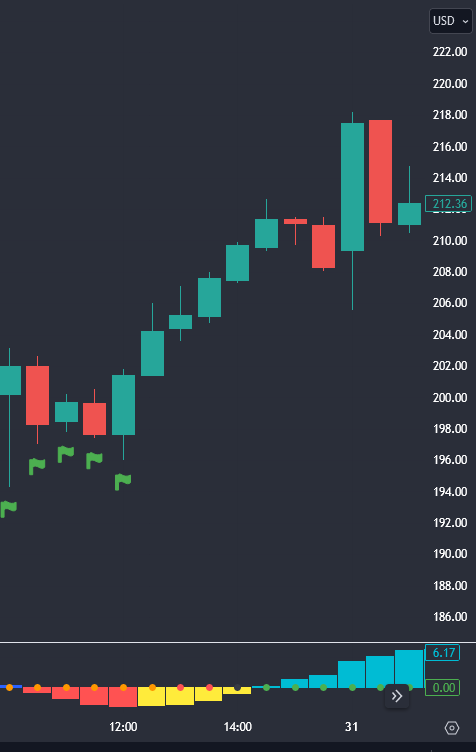
## DXCM 60m (N=6, T=15) min=0, max=12.5, PLr=9.4, PLd=12.5
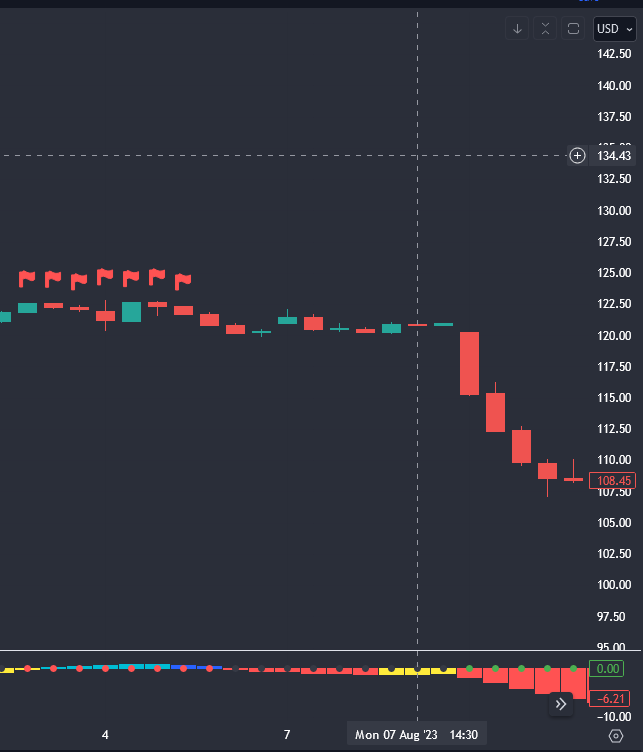

In [44]:
def time_sorted_indexer(*columns):
    columns = columns or ("min", "max", "final")
    return list(itertools.product([*columns], ["5m", "15m", "30m", "60m"]))

# PLr PLd Analysis

## 5m

<Axes: xlabel='T', ylabel='N'>

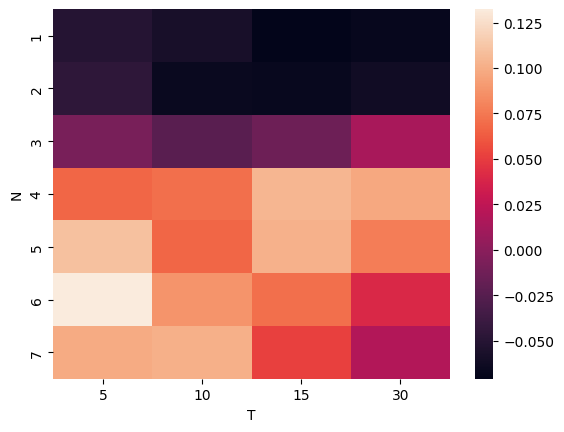

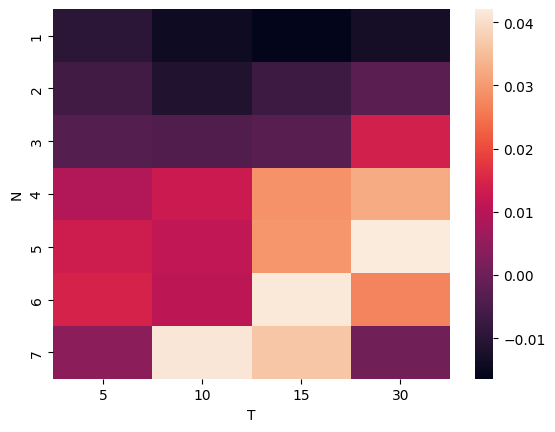

In [197]:
metrics_5m = df[df.tf == "5m"].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_5m.PLr)
plt.figure()
sns.heatmap(metrics_5m.PLd)

- Good PLr trend for T=5/10 
- Good PLd trend for T=15
- other T are noisy

## 15m

<Axes: xlabel='T', ylabel='N'>

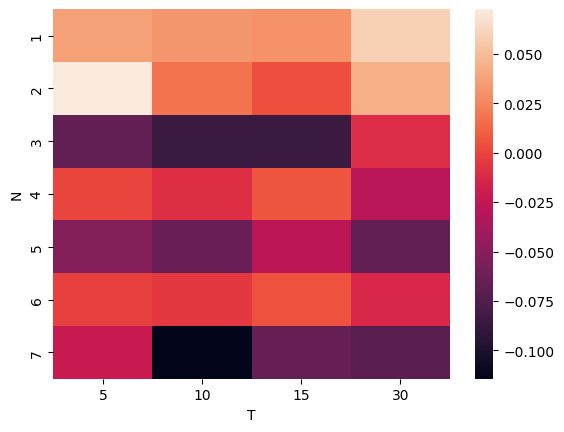

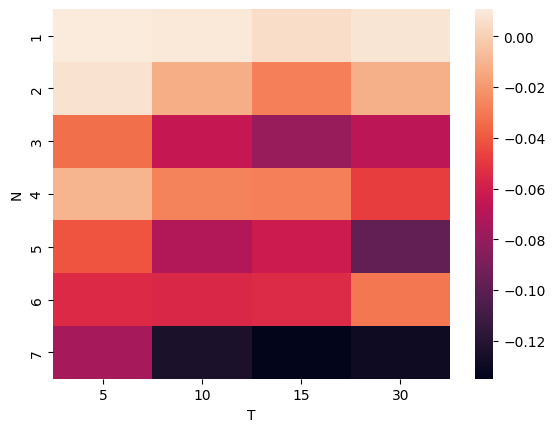

In [198]:
metrics_15m = df[df.tf == "15m"].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_15m.PLr)
plt.figure()
sns.heatmap(metrics_15m.PLd)

- PLr and PLd very noisy
- Bad values for PLr and PLd

## 30m

<Axes: xlabel='T', ylabel='N'>

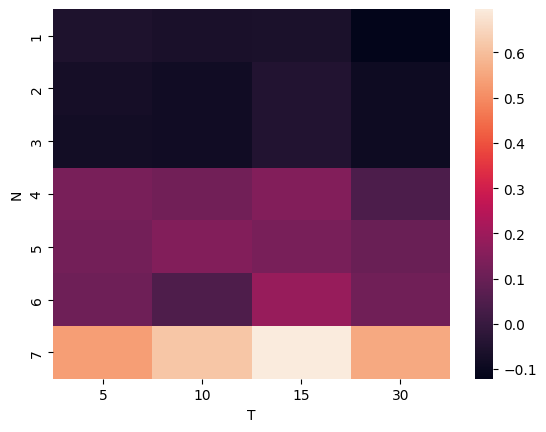

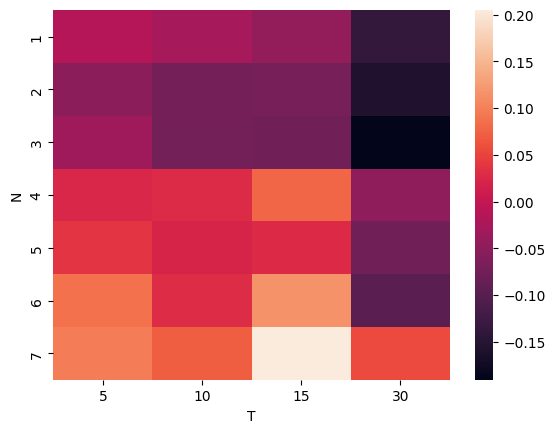

In [199]:
metrics_30m = df[df.tf == "30m"].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_30m.PLr)
plt.figure()
sns.heatmap(metrics_30m.PLd)

- Good PLr and PLd trend
- N=7 has good PLr

## 60m

<Axes: xlabel='T', ylabel='N'>

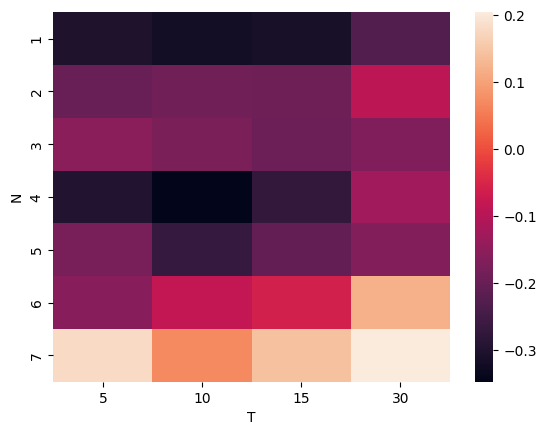

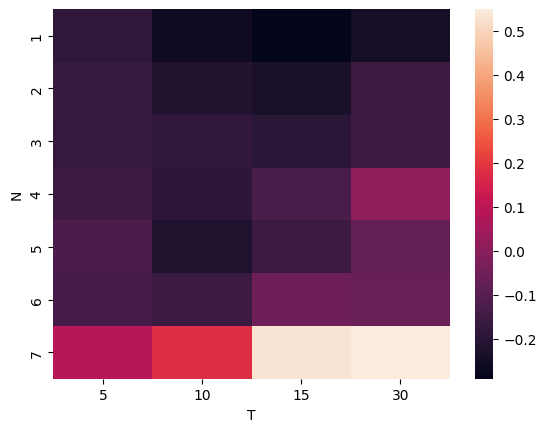

In [201]:
metrics_60m = df[df.tf == "60m"].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_60m.PLr)
plt.figure()
sns.heatmap(metrics_60m.PLd)

- PLr and PLd are noisy
- N=7 has good PLr